In [1]:
# Monte Carlo Estimation of crafting success rolls in Cataclysm-DDA as of 901e4d4 (2021-05-27)
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import skew, kurtosis, gaussian_kde
from scipy.special import erf, erfc

import time

starttime = time.time()

# Number of rolls
N = 1000000


# Player skill and recipe difficulty.  For recipes with only 1 skill, set primary_skill=secondary_skill,
# same with difficulty.
primary_skill   = 6
secondary_skill = 6
primary_diff    = 3
secondary_diff  = 3

# Penalty for missing proficiencies
prof_mult = 1.5*1.25

# Current intelligence
cur_int = 8

skill_dice  = 3*primary_skill + secondary_skill
skill_sides = 16 + cur_int

diff_dice   = 3*primary_diff + secondary_diff
diff_sides  = 24

skill_throw = np.random.randint(low=1, high=skill_sides, size=(skill_dice, N))
skill_rolls = np.sum(skill_throw, axis = 0)

diff_throw  = np.random.randint(low=1, high=diff_sides,  size=(diff_dice, N))
diff_rolls  = np.sum(diff_throw, axis = 0)
diff_rolls  = diff_rolls * prof_mult

# skill_rolls_norm = (skill_rolls - np.mean(skill_rolls))/np.std(skill_rolls)

both_rolls = (skill_rolls / diff_rolls)

print('Success probability: {:2.2%}'.format(np.mean(both_rolls >= 1.0)))

Success probability: 62.95%


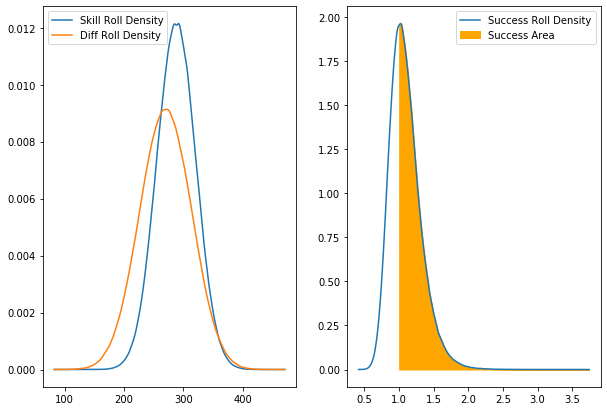

In [2]:
# Plots

# Density estimations
density_skill = gaussian_kde(skill_rolls)
density_diff  = gaussian_kde(diff_rolls)
density_both = gaussian_kde(both_rolls)

fig = plt.figure(figsize=(10, 7))

# Right density and probability plot. The shaded area equals the probability of success.
ax1 = fig.add_subplot(122)

x = np.linspace(np.min(both_rolls), np.max(both_rolls), 1000)

ax1.plot(x, density_both(x), label='Success Roll Density')

ax1.fill_between(x, density_both(x), where=np.array([x > 1.0]).transpose()[:, 0], color='orange', label='Success Area')

ax1.legend()



# Left density plot.
ax2  = fig.add_subplot(121)

X = np.linspace(np.min((skill_rolls, diff_rolls)), np.max((skill_rolls, diff_rolls)), 1000)

ax2.plot(X, density_skill(X), label='Skill Roll Density')
ax2.plot(X, density_diff(X), label='Diff Roll Density')

ax2.legend()